In [12]:
import pandas as pd

In [13]:
df = pd.read_csv("./assets/pokemon.csv")

In [14]:
df.shape

(801, 41)

In [15]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [16]:
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [20]:
df.loc[:,['weight_kg', 'height_m', 'hp', 'attack', 'defense','speed']]


,weight_kg,height_m,hp,attack,defense,speed
0,6.9,0.7,45,49,49,45
1,13.0,1.0,60,62,63,60
2,100.0,2.0,80,100,123,80
3,8.5,0.6,39,52,43,65
4,19.0,1.1,58,64,58,80
...,...,...,...,...,...,...
796,999.9,9.2,97,101,103,61
797,0.1,0.3,59,181,131,109
798,888.0,5.5,223,101,53,43
799,230.0,2.4,97,107,101,79


In [21]:
df.shape

(801, 41)

In [22]:
df.isna().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


In [28]:
df = df.loc[df.height_m.notna(), ['weight_kg', 'height_m', 'hp', 'attack', 'defense','speed']]

In [30]:
df.shape

(781, 6)

In [31]:
df.isna().sum()

weight_kg    0
height_m     0
hp           0
attack       0
defense      0
speed        0
dtype: int64

In [32]:
df.head()

,weight_kg,height_m,hp,attack,defense,speed
0,6.9,0.7,45,49,49,45
1,13.0,1.0,60,62,63,60
2,100.0,2.0,80,100,123,80
3,8.5,0.6,39,52,43,65
4,19.0,1.1,58,64,58,80


Text(0, 0.5, 'pokémon height [m]')

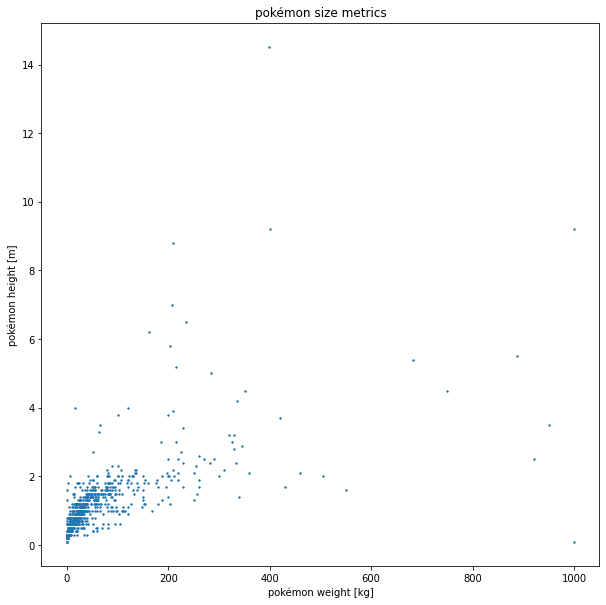

In [33]:
import matplotlib.pyplot as plt

# plot size metrics
fig=plt.figure(figsize=(10,10))
plt.scatter(df['weight_kg'], df['height_m'], s=2)
plt.title("pokémon size metrics")
plt.xlabel("pokémon weight [kg]")
plt.ylabel("pokémon height [m]")

(0.0, 2.5)

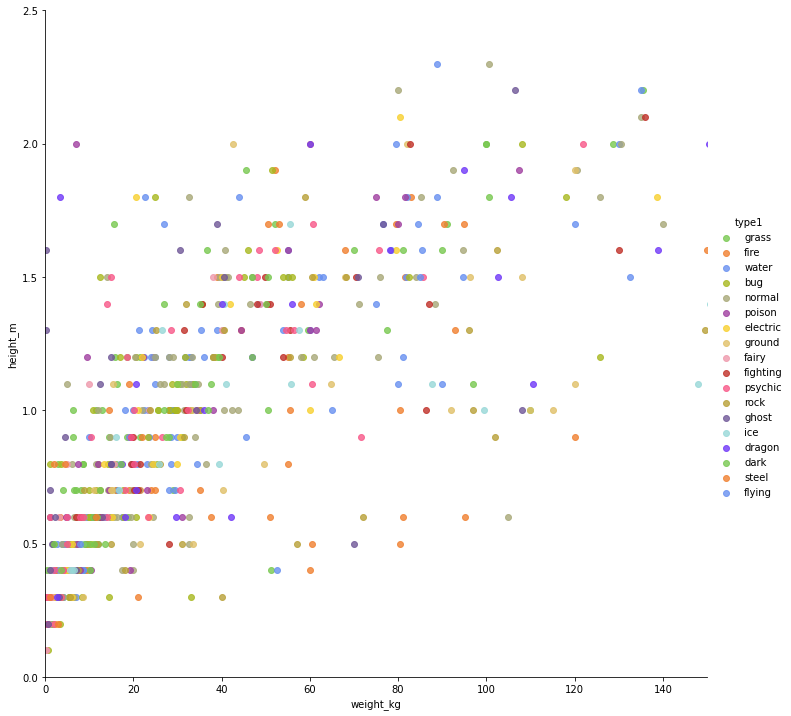

In [37]:
# visualise your clusters here (take a look at the pandas scatter_matrix or seaborn's pairplot method)
import seaborn as sns

# define colors
pokemon_type_colors = ['#78C850',  # Grass
                       '#F08030',  # Fire
                       '#6890F0',  # Water
                       '#A8B820',  # Bug
                       '#A8A878',  # Normal
                       '#A040A0',  # Poison
                       '#F8D030',  # Electric
                       '#E0C068',  # Ground
                       '#EE99AC',  # Fairy
                       '#C03028',  # Fighting
                       '#F85888',  # Psychic
                       '#B8A038',  # Rock
                       '#705898',  # Ghost
                       '#98D8D8',  # Ice
                       '#7038F8',  # Dragon
                   ]

# plot data with the type color palette
sns.lmplot(x='weight_kg', y='height_m',  height=10, data=pokemon,
           fit_reg=False, # No regression line
           hue='type1', palette= pokemon_type_colors)

# limit plot
plt.xlim([0, 150])
plt.ylim([0, 2.5])

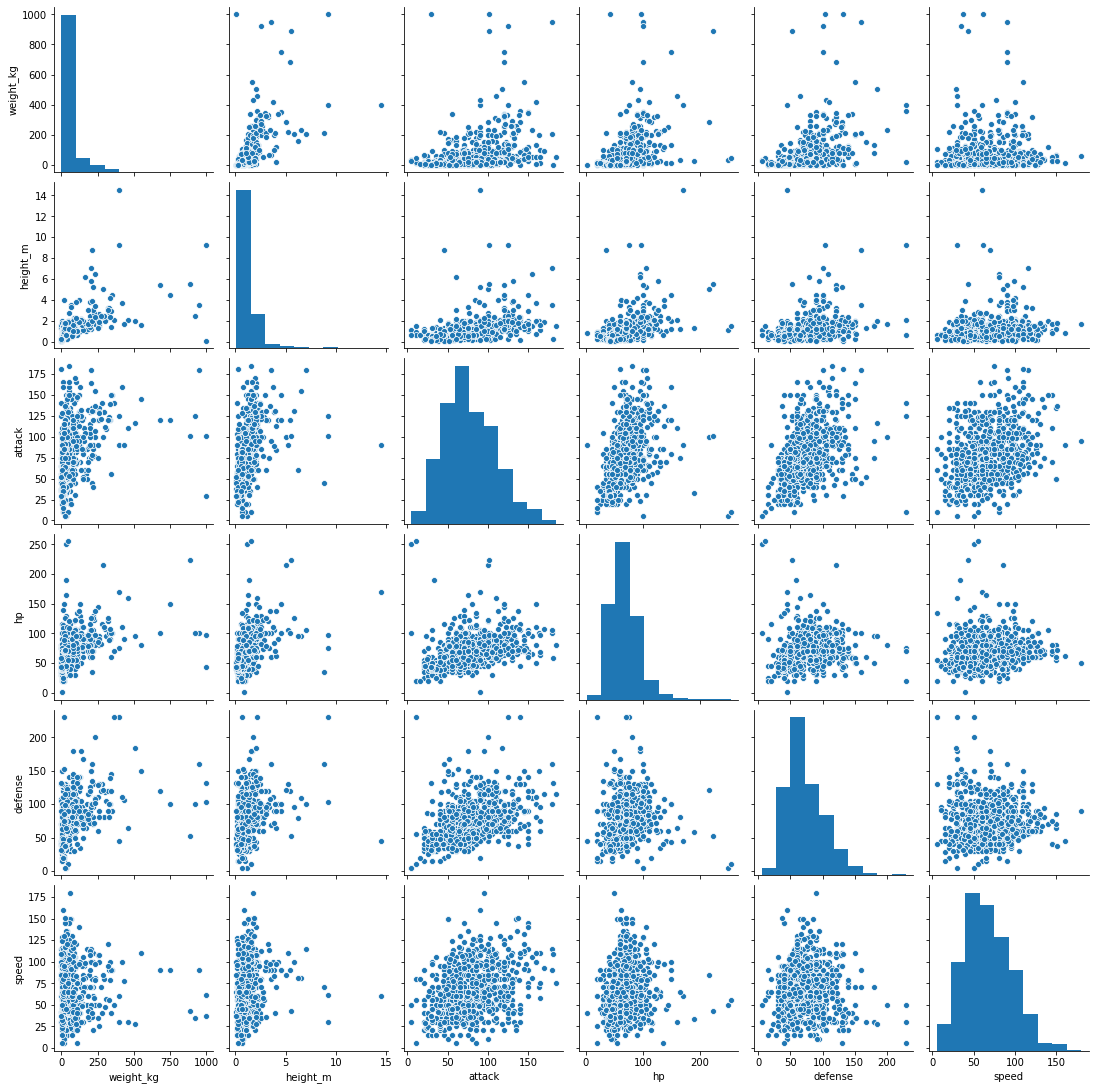

In [39]:
sns.pairplot(df[['weight_kg', 'height_m', 'attack', 'hp', 'defense', 'speed']]) 
plt.show()

In [40]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

# Instantiate the clustering model and visualizer
model = KMeans(max_iter=1000, random_state=42)
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')

features = ['weight_kg', 'height_m', 'attack', 'hp', 'defense', 'speed']

In [41]:
X = df[features].values

2020-12-29 15:52:59,848 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)

2020-12-29 15:52:59,850 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)

2020-12-29 15:52:59,853 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.w

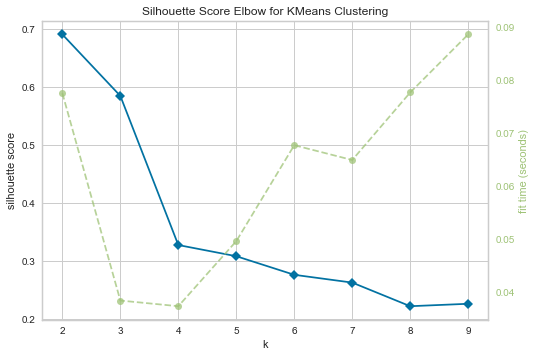

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [42]:
visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [43]:
model_kmeans = KMeans(n_clusters=3, max_iter=1000, random_state=42)

In [44]:
df['kmeans_group'] = model_kmeans.fit_predict(X)

In [45]:
cluster_center = pd.DataFrame(model_kmeans.cluster_centers_)
cluster_center.columns = features
cluster_center['total'] = cluster_center.sum(axis=1)

cluster_center['ordered_label'] = cluster_center.total.rank().astype(int)
cluster_center.sort_values(by='ordered_label').set_index('ordered_label')

,weight_kg,height_m,attack,hp,defense,speed,total
ordered_label,,,,,,,
1,30.691789,0.929765,73.174487,65.089443,68.252199,65.790323,303.928006
2,222.678022,2.665934,108.274725,95.835165,104.945055,69.659341,604.058242
3,842.600000,4.037500,115.125000,111.625000,114.625000,69.500000,1257.512500


In [46]:
relabel = cluster_center.ordered_label.to_dict()
df.kmeans_group = df.kmeans_group.map(lambda x: relabel[x])

In [47]:
df.kmeans_group.value_counts()

1    682
2     91
3      8
Name: kmeans_group, dtype: int64

In [48]:
df.loc[df.kmeans_group==1].sample(10, random_state=42)

,weight_kg,height_m,hp,attack,defense,speed,kmeans_group
341,32.8,1.1,63,120,85,55,1
173,1.0,0.3,90,30,15,15,1
253,52.2,1.7,70,110,75,145,1
144,52.6,1.6,90,90,85,100,1
352,2.3,0.6,44,75,35,45,1
438,13.0,0.6,20,25,45,60,1
417,29.5,0.7,55,65,35,85,1
186,0.5,0.4,35,35,40,50,1
396,15.5,0.6,55,75,50,80,1
675,28.0,1.2,75,80,60,102,1


In [49]:
df.loc[df.kmeans_group==2].sample(10, random_state=42)

,weight_kg,height_m,hp,attack,defense,speed,kmeans_group
388,310.0,2.2,95,109,105,56,2
248,216.0,5.2,106,90,130,110,2
492,320.0,3.2,120,120,120,120,2
791,120.0,4.0,137,113,89,97,2
58,155.0,1.9,90,110,80,95,2
305,360.0,2.1,70,140,230,50,2
383,206.5,7.0,105,180,100,115,2
637,250.0,2.1,91,90,129,108,2
204,125.8,1.2,75,90,140,40,2
459,135.5,2.2,90,132,105,30,2


In [50]:
df.loc[df.kmeans_group==3].sample(6, random_state=42)

,weight_kg,height_m,hp,attack,defense,speed,kmeans_group
382,950.0,3.5,100,180,160,90,3
789,999.9,0.1,43,29,131,37,3
375,550.0,1.6,80,145,150,110,3
798,888.0,5.5,223,101,53,43,3
482,683.0,5.4,100,120,120,90,3
749,920.0,2.5,100,125,100,35,3


In [51]:
def bin_value(some_series, bins=3):
    cumsum_series = some_series.value_counts().sort_index().cumsum()
    limits = [len(some_series)/bins*i for i in range(1, bins)]
    right_edge = [abs(cumsum_series-i).idxmin() for i in limits]
    return [sum([x>i for i in right_edge]) for x in some_series]

In [52]:
X2 = df[features].apply(bin_value)

2020-12-29 15:55:43,851 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)

2020-12-29 15:55:43,851 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)

2020-12-29 15:55:43,852 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.w

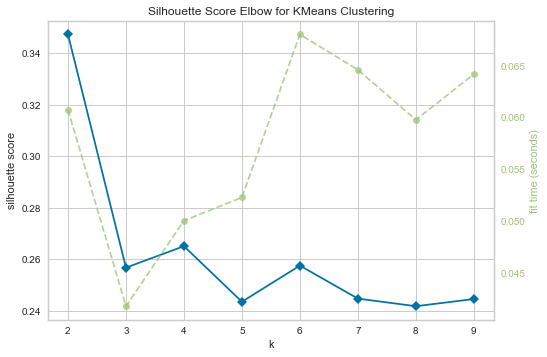

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [53]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X2)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data

In [54]:
model_kmeans_bins = KMeans(n_clusters=3, max_iter=1000, random_state=42)

In [55]:
df['kmeans_bin_group'] = model_kmeans_bins.fit_predict(X2)

In [56]:
cluster_center_bins = pd.DataFrame(model_kmeans_bins.cluster_centers_)
cluster_center_bins.columns = features
cluster_center_bins['total'] = cluster_center_bins.sum(axis=1)
cluster_center_bins['ordered_label'] = cluster_center_bins.total.rank().astype(int)

cluster_center_bins.sort_values(by='ordered_label').set_index('ordered_label')

,weight_kg,height_m,attack,hp,defense,speed,total
ordered_label,,,,,,,
1,0.293478,0.202899,0.293478,0.275362,0.460145,0.423913,1.949275
2,0.862500,0.962500,1.029167,1.116667,0.891667,1.400000,6.262500
3,1.856604,1.860377,1.698113,1.600000,1.626415,1.173585,9.815094


In [57]:
relabel_bins = cluster_center_bins.ordered_label.to_dict()
df.kmeans_bin_group = df.kmeans_bin_group.map(lambda x: relabel_bins[x])

In [58]:
df.kmeans_group.value_counts().sort_index()

1    682
2     91
3      8
Name: kmeans_group, dtype: int64

In [59]:
df['group_combi'] = df.iloc[:,-2:].astype(str).apply(lambda x: ''.join(x), axis=1)

In [60]:
group_count = df.group_combi.value_counts().sort_index()
group_count

11    275
12    237
13    170
22      3
23     88
31      1
33      7
Name: group_combi, dtype: int64

In [61]:
from sklearn.metrics import adjusted_mutual_info_score, normalized_mutual_info_score, adjusted_rand_score, confusion_matrix

In [62]:
print(adjusted_mutual_info_score(df['kmeans_bin_group'], df['kmeans_group']))
print(adjusted_rand_score(df['kmeans_bin_group'], df['kmeans_group']))

0.1731508273852574
0.05563509982320447


In [63]:
confusion_matrix(df['kmeans_bin_group'], df['kmeans_group'])

array([[275,   0,   1],
       [237,   3,   0],
       [170,  88,   7]])

In [64]:
df.loc[df.group_combi=='13']

,weight_kg,height_m,hp,attack,defense,speed,kmeans_group,kmeans_bin_group,group_combi
2,100.0,2.0,80,100,123,80,1,3,13
5,90.5,1.7,78,104,78,100,1,3,13
8,85.5,1.6,79,103,120,78,1,3,13
23,65.0,3.5,60,95,69,80,1,3,13
30,60.0,1.3,90,92,87,76,1,3,13
...,...,...,...,...,...,...,...,...,...
784,20.5,1.8,70,115,85,130,1,3,13
786,45.5,1.9,70,130,115,75,1,3,13
787,21.2,1.3,70,75,115,85,1,3,13
795,100.0,3.8,83,89,71,83,1,3,13


In [65]:
df.loc[df.group_combi=='31']

,weight_kg,height_m,hp,attack,defense,speed,kmeans_group,kmeans_bin_group,group_combi
789,999.9,0.1,43,29,131,37,3,1,31


In [66]:
X2_4 = df[features].apply(bin_value, bins=4)

2020-12-29 15:58:08,283 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:182: YellowbrickWarning: No "knee" or "elbow point" detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)

2020-12-29 15:58:08,286 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/utils/kneed.py:140: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)

2020-12-29 15:58:08,286 [4959] WARNING  py.warnings:109: [JupyterRequire] /Users/mauricemagorane/opt/anaconda3/lib/python3.8/site-packages/yellowbrick/cluster/elbow.py:343: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.w

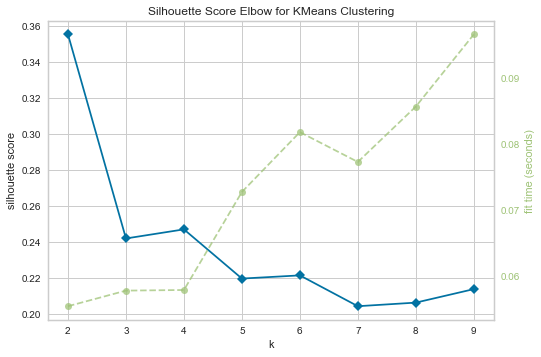

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [67]:
visualizer = KElbowVisualizer(model, k=(2,10), metric='silhouette')
visualizer.fit(X2_4)    # Fit the data to the visualizer
visualizer.poof()    # Draw/show/poof the data